In [12]:
#### DESIGN RUN NAME #####################################################################################################
DESIGN_FOLDER     = 'AB_TEST_Grid_AIzyme_Functions_009'
FOLDER_MATCH      = 'MATCH' #Not needed for now -> This is just for match
FOLDER_PARENT     = '../../design/Parent_1ohp' # -> Adjust, contains ONLY parent pdbs
##########################################################################################################################
#### Input parameters ####################################################################################################
MAX_JOBS          = 5
N_PARENT_JOBS     = 10
MAX_DESIGNS       = 100
KBT_BOLTZMANN     = 0.02
CST_WEIGHT        = 1.0
HIGHSCORE         = 0.93
NEG_BEST          = 0.79
ProteinMPNN_PROB  = 0.0
WT                = "1ohp"
LIGAND            = "5TS"
REPACK            = "36,45,51,67"
MATCH             = "14,18,26,30,55,65,80,82,99,101,112"
DESIGN            = "7,10,11,14,15,18,26,29,30,38,54,55,58,59,63,65,71,73,78"
DESIGN           += ",80,82,84,86,93,95,97,99,101,103,109,112,114,116,121"
ProteinMPNN_T     = "0.1"
SUBMIT_PREFIX     = "AB1" # Adjust, use a short prefix to allow 
BLUEPEBBLE        = True
GRID              = False
BACKGROUND_JOB    = False

if GRID:            ROSETTA_PATH = "/home/bunzelh/rosetta_src_2021.16.61629_bundle/main/source/"      #GRID
if BLUEPEBBLE:      
                    ROSETTA_PATH = "/sw/apps/rosetta/rosetta_src_2021.16.61629_bundle/main/source/"   #BLUEPEBBLE 
                    BLUEPEBBLE_ACCOUNT = "ptch000361"
                    #BLUEPEBBLE_ACCOUNT = "ptch000721"
if BACKGROUND_JOB:  ROSETTA_PATH = "/sw/apps/rosetta/rosetta_src_2021.16.61629_bundle/main/source/"   #BLUEPEBBLE 
    
NORM              = {'interface_score': [10, 30], 'total_score': [340, 410], 'catalytic_score': [-40, 0]}
##########################################################################################################################
AIZYME_TOOLS      = "../src/AIzymes_009.ipynb"
%run "$AIZYME_TOOLS"

AIzyme Functions loaded!


AIzyme Functions loaded!
DESIGN_FOLDER    : AB_TEST_Grid_AIzyme_Functions_009
FOLDER_MATCH     : MATCH
MAX_JOBS         : 5
N_PARENT_JOBS    : 10
MAX_DESIGNS      : 100
KBT_BOLTZMANN    : 0.02
CST_WEIGHT       : 1.0
ProteinMPNN_PROB : 0.0
WT               : 1ohp
LIGAND           : 5TS
ROSETTA_PATH     : /sw/apps/rosetta/rosetta_src_2021.16.61629_bundle/main/source/
REPACK           : 36,45,51,67
DESIGN           : 7,10,11,14,15,18,26,29,30,38,54,55,58,59,63,65,71,73,78,80,82,84,86,93,95,97,99,101,103,109,112,114,116,121
MATCH            : 14,18,26,30,55,65,80,82,99,101,112
FOLDER_PARENT    : ../../design/Parent_1ohp
ProteinMPNN_T    : 0.1
SUBMIT_PREFIX    : AB1
BLUEPEBBLE       : True
GRID             : False
BACKGROUND_JOB   : False
EXPLORE          : True
catalytic_score [-40, 0] total_score [340, 410] interface_score [10, 30] HIGHSCORE: 0.62 Designs: 14 Parents: 1


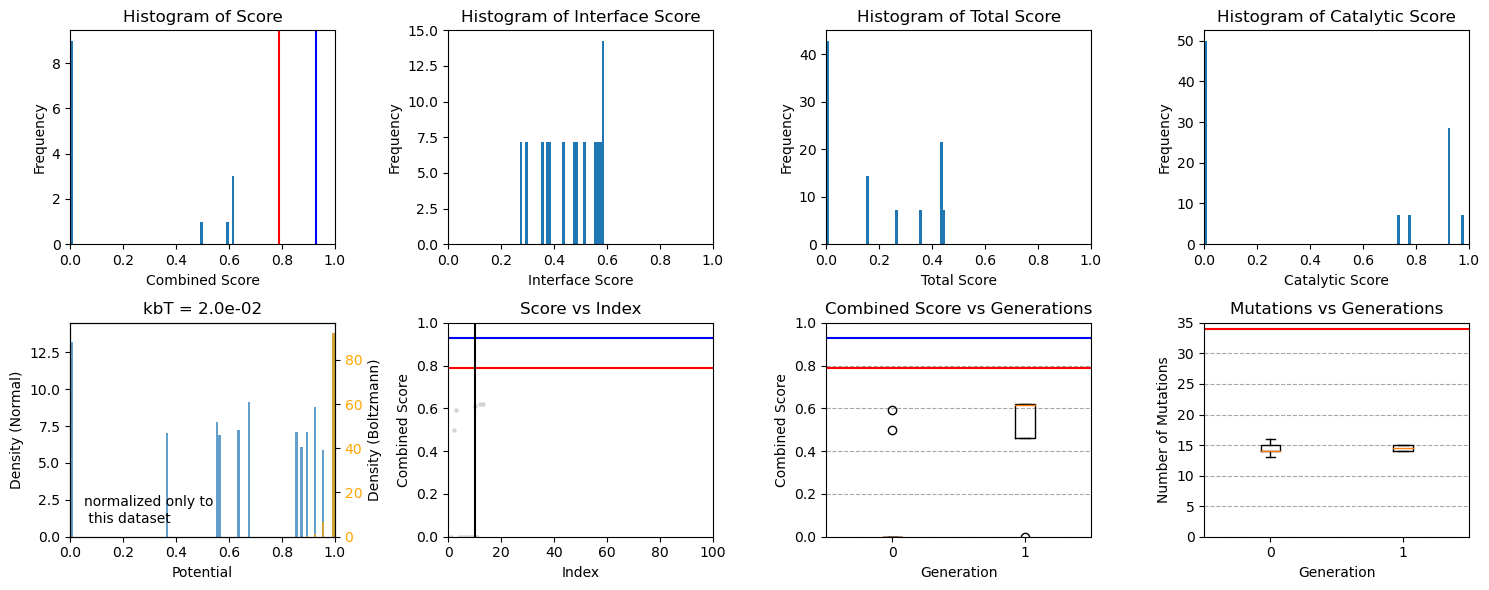

KeyboardInterrupt: 

In [17]:
%run "$AIZYME_TOOLS"
controller(RESET=False, EXPLORE=True, UNBLOCK_ALL=False, PRINT_VAR=True, PLOT_DATA=True) 

In [3]:
!squeue --me
#!scancel --me

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           8146434     short AB1_Rose  hb18661 PD       0:00      1 (Priority)
           8146433     short AB1_Rose  hb18661 PD       0:00      1 (Priority)
           8146431     short AB1_Rose  hb18661 PD       0:00      1 (Priority)
           8146430     short AB1_Rose  hb18661 PD       0:00      1 (Priority)
           8146429     short AB1_Rose  hb18661 PD       0:00      1 (Priority)


In [18]:
%run "$AIZYME_TOOLS"
all_scores_df = pd.read_csv(f"{DESIGN_FOLDER}/all_scores.csv")
display(all_scores_df)

AIzyme Functions loaded!


,index,sequence,parent_index,interface_score,total_score,catalytic_score,interface_potential,total_potential,catalytic_potential,generation,mutations,design_method,score_taken_from,blocked,cat_resi,cat_resn,kbt_boltzmann,luca
0,0,MNTPEHITAVVQRFLAALNAGDLDGIVALFADDATVEIPVGSEPRS...,Parent,-17.150,-303.802,2.816,-17.150,-303.802,2.816,0,16.0,RosettaDesign,Design,False,99,GLU,0.02,1ohp
1,1,MNTPEHITAVVQRFVAALNAGDLDGIVALFADDATVEAPVGSEPRS...,Parent,-21.377,-350.781,114.481,-21.377,-350.781,114.481,0,14.0,RosettaDesign,Relax,False,99,GLU,0.02,1ohp
2,2,MNTPEHITAVVQRFVAAMNAGDLDGIVALFADDATVEIPVGSEPRS...,Parent,-19.589,-364.596,10.761,-19.589,-364.596,10.761,0,14.0,RosettaDesign,Relax,False,99,GLU,0.02,1ohp
3,3,MNTPEHMTAVVQRFVAALNAGDLDGIVALFADDATVEIPVGSEPRS...,Parent,-19.666,-370.676,0.891,-19.666,-370.676,0.891,0,14.0,RosettaDesign,Relax,False,99,GLU,0.02,1ohp
4,4,MNTPEHITAVVQRFVAALNAGDLDGIVALFADDATVEAPVGSEPRS...,Parent,-21.516,-358.534,81.759,-21.516,-358.534,81.759,0,14.0,RosettaDesign,Relax,False,99,GLU,0.02,1ohp
5,5,MNTPEHITAVVQRFVAALNAGDLDGIVALFADDATVETPVGSEPRS...,Parent,-17.556,-285.915,100.300,-17.556,-285.915,100.300,0,15.0,RosettaDesign,Design,False,99,GLU,0.02,1ohp
6,6,MNTPEHITAVVQRFFAAMNAGDLDGIVALFADDATVEVPVGSEPRS...,Parent,-15.824,-350.777,148.398,-15.824,-350.777,148.398,0,13.0,RosettaDesign,Relax,False,99,ASP,0.02,1ohp
7,7,MNTPEHITAVVQRIVAAWNAGDLDGIVALFADDATVEAPVGSEPRS...,Parent,-20.375,-262.988,231.764,-20.375,-262.988,231.764,0,16.0,RosettaDesign,Design,False,99,GLU,0.02,1ohp
8,8,MNTPEHITAVVQRWAAALNAGDLDGIVALFADDATVEAPVGSEPRS...,Parent,-17.694,-170.867,783.931,-17.694,-170.867,783.931,0,15.0,RosettaDesign,Design,False,99,GLU,0.02,1ohp
9,9,MNTPEHMTAVVQRFVAALNAGDLDGIVALFADDATVEVPVGSEPRS...,Parent,-15.402,-309.946,9.119,-15.402,-309.946,9.119,0,13.0,RosettaDesign,Design,False,99,GLU,0.02,1ohp


In [6]:
%run "$AIZYME_TOOLS"
#get_best_structures()

AIzyme Functions loaded!
